<a href="https://colab.research.google.com/github/PratheenSam/git_trail_version/blob/main/Snippets_Importing_libraries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:

# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [22]:

import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [23]:

!pip install kaggle

In [25]:

kaggle_credentails = json.load(open("kaggle.json"))

In [26]:
# setup Kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]


In [27]:
!kaggle datasets download -d aryashah2k/indian-medicinal-leaves-dataset

Dataset URL: https://www.kaggle.com/datasets/aryashah2k/indian-medicinal-leaves-dataset
License(s): CC-BY-NC-SA-4.0
100% 8.99G/9.00G [01:27<00:00, 140MB/s]
100% 9.00G/9.00G [01:27<00:00, 110MB/s]


In [28]:

!ls

indian-medicinal-leaves-dataset.zip  kaggle.json  sample_data


In [29]:

# Unzip the downloaded dataset
with ZipFile("/content/indian-medicinal-leaves-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()


In [31]:

print(os.listdir("/content/Indian Medicinal Leaves Image Datasets"))

print(len(os.listdir("/content/Indian Medicinal Leaves Image Datasets/Medicinal Leaf dataset")))
print(os.listdir("/content/Indian Medicinal Leaves Image Datasets/Medicinal Leaf dataset")[:5])

print(len(os.listdir("/content/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset")))
print(os.listdir("/content/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset")[:5])

# print(len(os.listdir("plantvillage dataset/grayscale")))
# print(os.listdir("plantvillage dataset/grayscale")[:5])

['Medicinal Leaf dataset', 'Medicinal plant dataset']
80
['Caricature', 'Palak(Spinach)', 'Parijatha', 'Ganike', 'Insulin']
40
['Pappaya', 'Ganike', 'Insulin', 'Tulasi', 'Pomegranate']


In [ ]:

# print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
# print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])


In [64]:
# base_dir = '/content/Indian Medicinal Leaves Image Datasets/Medicinal Leaf dataset & Medicinal plant dataset'

# This is the likely correct path based on your earlier file exploration
base_dir = '/content/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset'

(600, 450, 3)


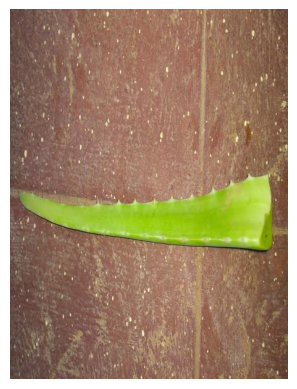

In [41]:

image_path = '/content/Indian Medicinal Leaves Image Datasets/Medicinal Leaf dataset/Aloevera/10.jpg'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [42]:

image_path = '/content/Indian Medicinal Leaves Image Datasets/Medicinal Leaf dataset/Amla/350.jpg'

# Read the image
img = mpimg.imread(image_path)

print(img)


[[[155 130 125]
  [151 126 121]
  [161 136 131]
  ...
  [113  87  74]
  [115  86  72]
  [115  86  72]]

 [[159 134 129]
  [155 130 125]
  [165 140 135]
  ...
  [115  87  75]
  [116  87  73]
  [116  87  73]]

 [[161 136 131]
  [157 132 127]
  [165 140 135]
  ...
  [116  88  76]
  [116  87  73]
  [118  86  73]]

 ...

 [[239 202 186]
  [218 181 165]
  [210 173 157]
  ...
  [195 163 152]
  [193 163 152]
  [193 163 152]]

 [[238 199 182]
  [214 175 158]
  [211 172 157]
  ...
  [194 164 153]
  [193 163 153]
  [193 163 153]]

 [[227 188 171]
  [210 171 154]
  [217 178 163]
  ...
  [196 166 155]
  [195 165 155]
  [195 165 155]]]


In [43]:

# Image Parameters
img_size = 224
batch_size = 32

In [44]:

# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)


In [65]:

# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 4648 images belonging to 40 classes.


In [66]:

# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 1151 images belonging to 40 classes.


In [67]:
# Model Definition
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [68]:
# model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │      47,776,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 40)                  │          10,280 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,805,672 (182.36 MB)

 Trainable params: 47,805,672 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [69]:

# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [71]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=2,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)

Epoch 1/2
145/145 ━━━━━━━━━━━━━━━━━━━━ 538s 4s/step - accuracy: 0.0913 - loss: 5.4800 - val_accuracy: 0.3143 - val_loss: 2.3148
Epoch 2/2
  1/145 ━━━━━━━━━━━━━━━━━━━━ 7:11 3s/step - accuracy: 0.2500 - loss: 2.6219

/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


145/145 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.2500 - loss: 2.6219 - val_accuracy: 0.4516 - val_loss: 2.0096


In [72]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


Evaluating model...
35/35 ━━━━━━━━━━━━━━━━━━━━ 33s 941ms/step - accuracy: 0.3039 - loss: 2.3513
Validation Accuracy: 30.45%


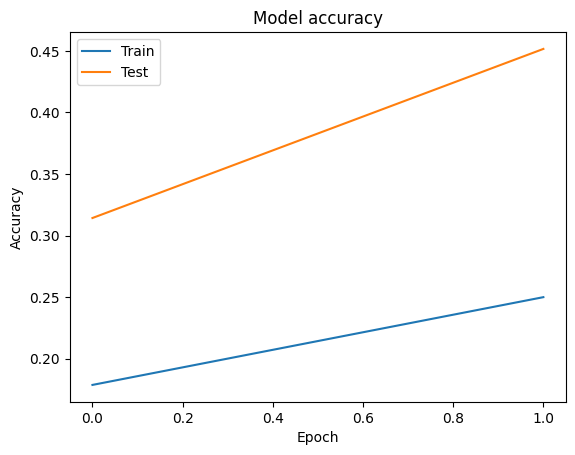

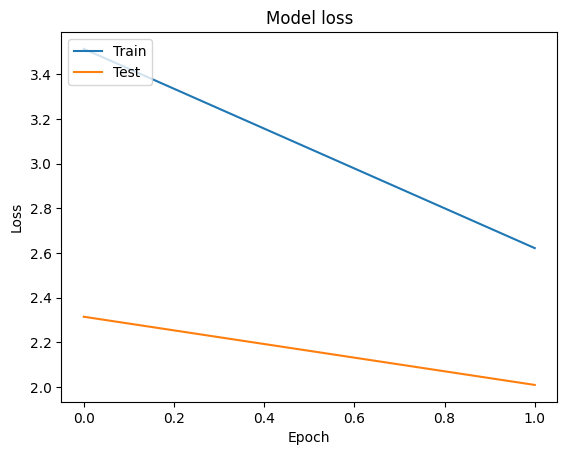

In [73]:

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [74]:



# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name



In [75]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [ ]:

class_indices

In [76]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [77]:

# Example Usage
image_path = '/content/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Amla/1300.jpg'
#image_path = '/content/test_blueberry_healthy.jpg'
#image_path = '/content/test_potato_early_blight.jpg'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
Predicted Class Name: Avacado


In [80]:
model.save('drive/MyDrive/Youtube/trained_models/plant_disease_prediction_model.h5')

In [79]:

model.save('plant_disease_prediction_model.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')